Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [1]:
import pandas as pd


In [2]:
#Data ingestion steps
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
#Check the datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30014 entries, 0 to 30013
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       30014 non-null  int64  
 1   carat    30014 non-null  float64
 2   cut      30014 non-null  object 
 3   color    30014 non-null  object 
 4   clarity  30014 non-null  object 
 5   depth    30014 non-null  float64
 6   table    30014 non-null  float64
 7   x        30014 non-null  float64
 8   y        30014 non-null  float64
 9   z        30014 non-null  float64
 10  price    30014 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.5+ MB


In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
#drop the id column as it has unique values
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
#check for duplicated records
df.duplicated().sum()
#If you have dupicate records use the df.drop_duplicates()

0

In [8]:
#Seggregate categorical and numerical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical_columns:",numerical_columns)
print("Categorical_columns:",categorical_columns)

Numerical_columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical_columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [9]:
df[categorical_columns].describe()

,cut,color,clarity
count,30014,30014,30014
unique,5,7,8
top,Ideal,G,SI1
freq,14405,6888,8197


In [10]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [11]:
df['cut'].nunique()

5

In [12]:
df['cut'].value_counts()

cut
Ideal        14405
Premium       7758
Very Good     5741
Good          1784
Fair           326
Name: count, dtype: int64

In [13]:
df['color'].value_counts()

color
G    6888
E    5453
F    5355
H    4747
D    3851
I    2764
J     956
Name: count, dtype: int64

In [14]:
df['clarity'].value_counts()

clarity
SI1     8197
VS2     7478
VS1     4731
SI2     4708
VVS2    2466
VVS1    1674
IF       675
I1        85
Name: count, dtype: int64

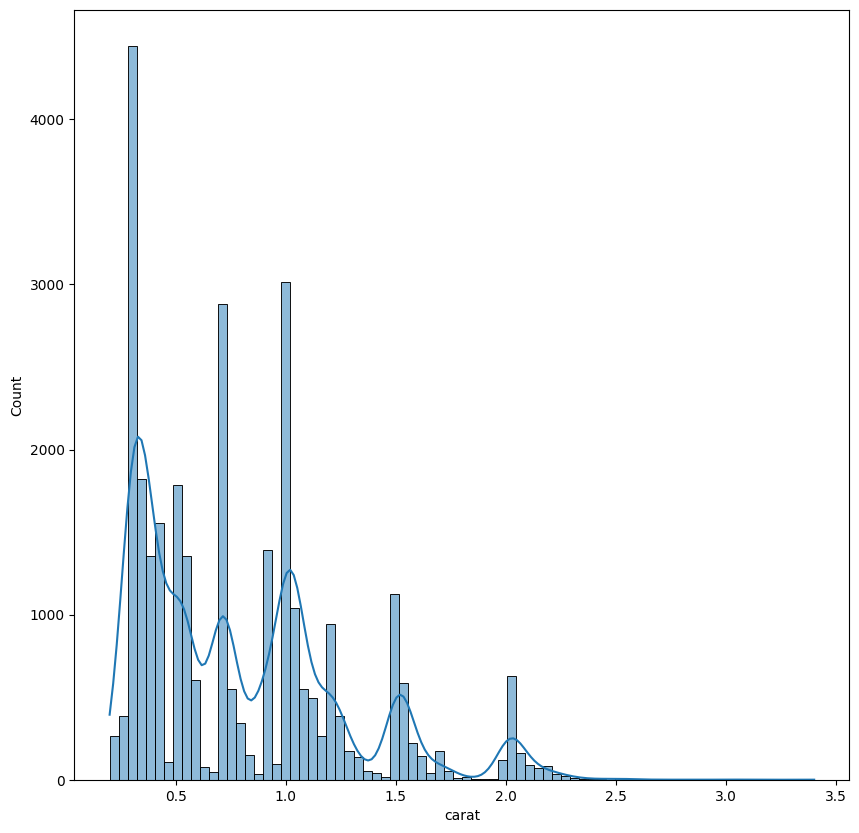

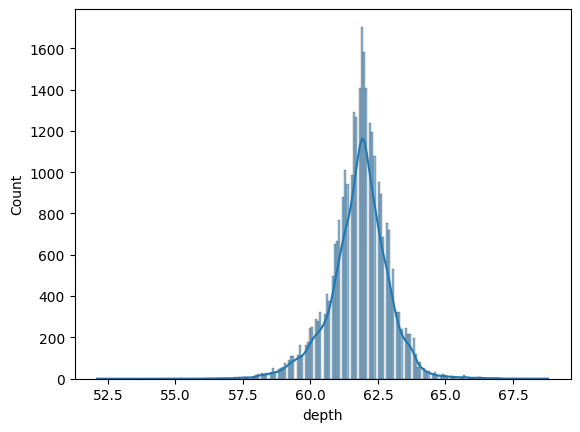

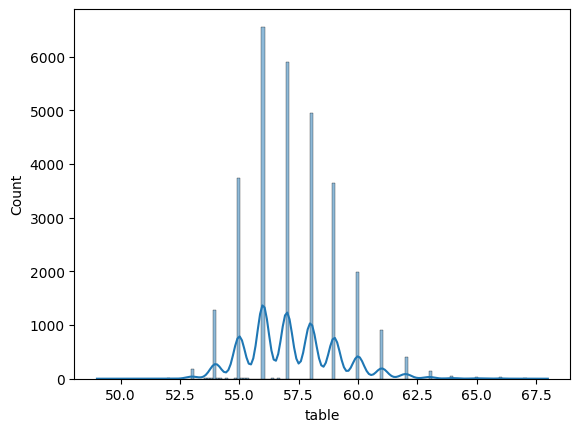

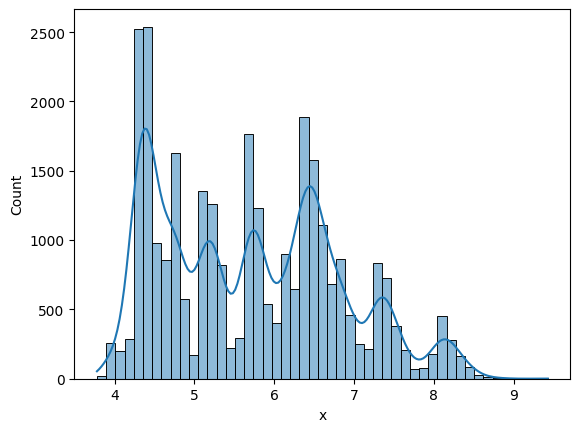

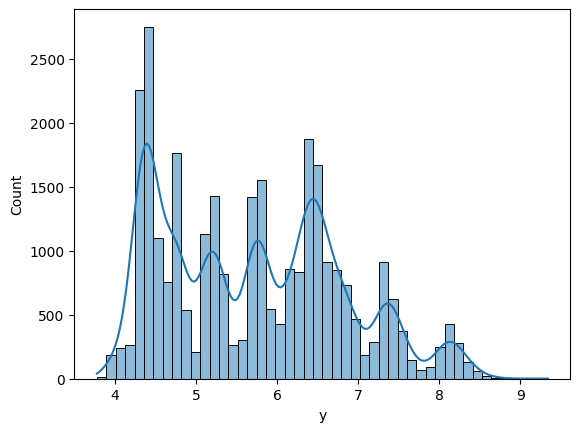

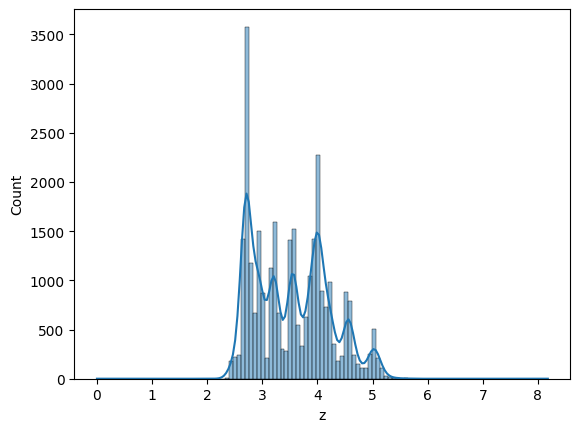

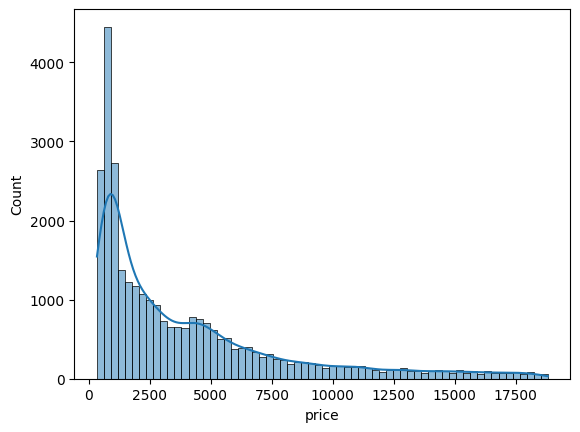

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

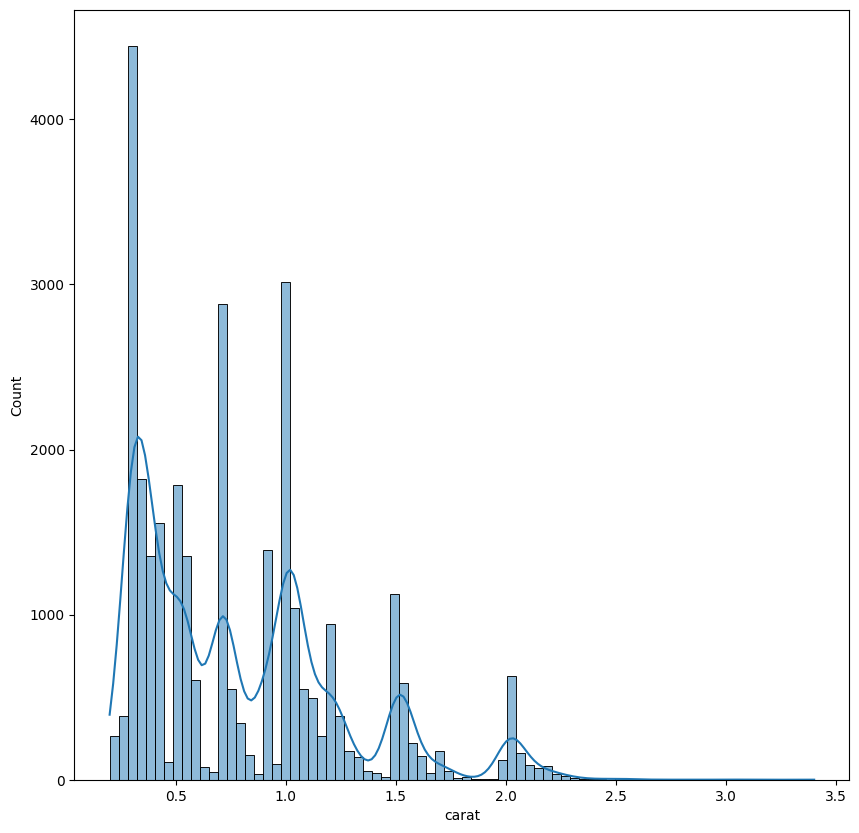

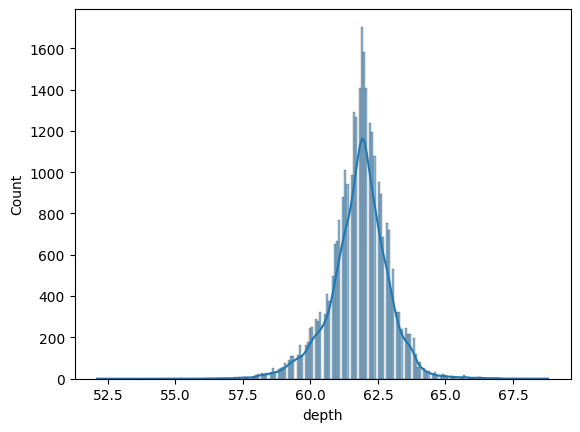

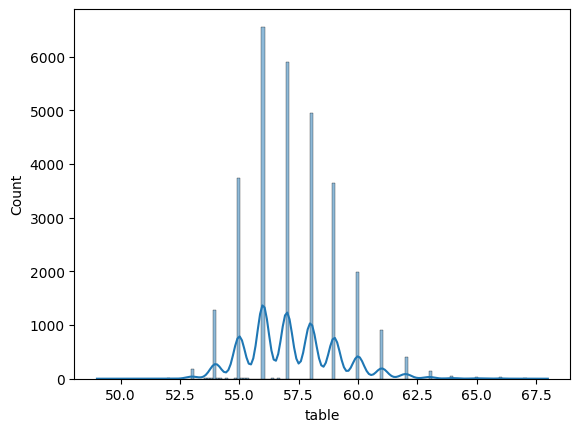

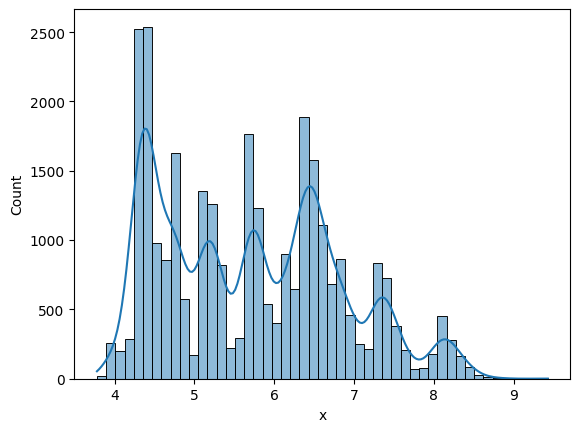

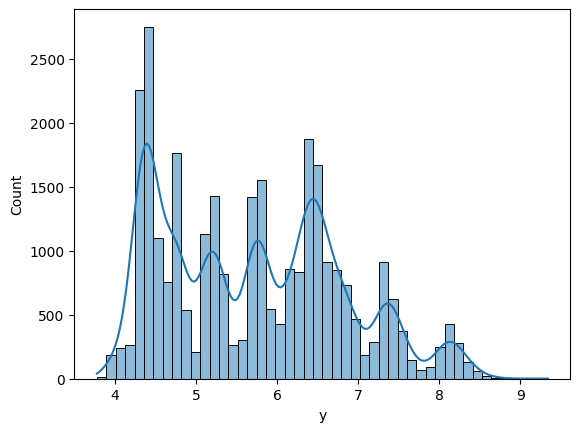

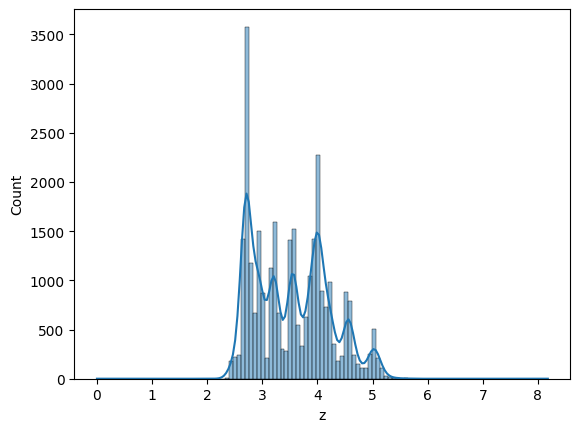

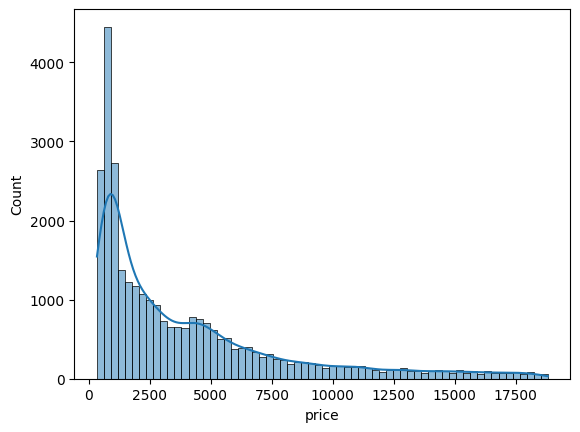

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

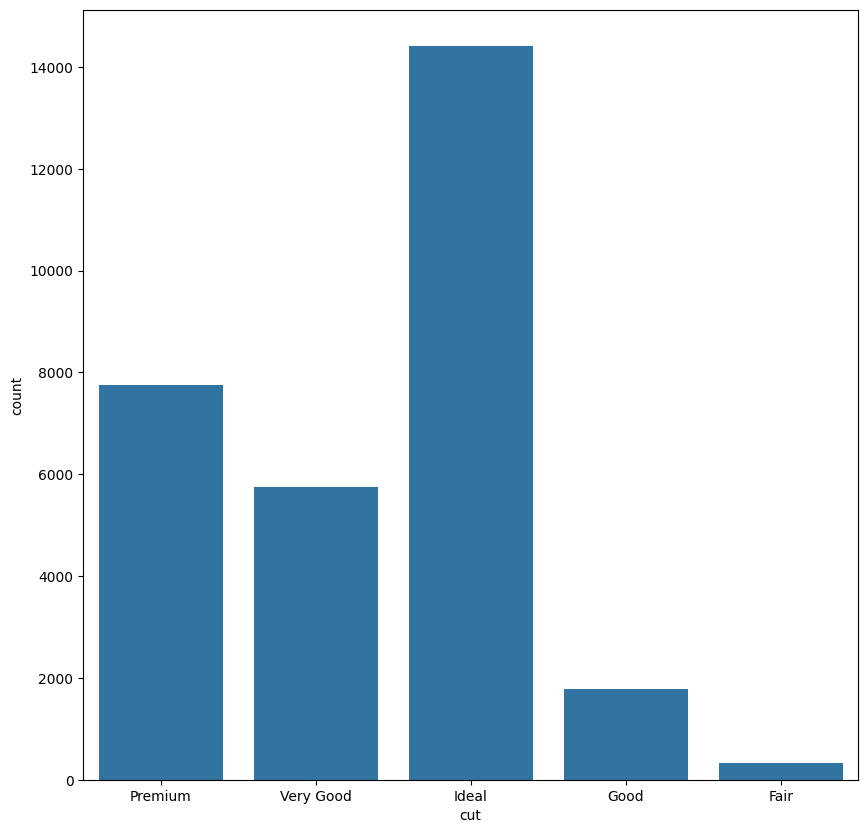

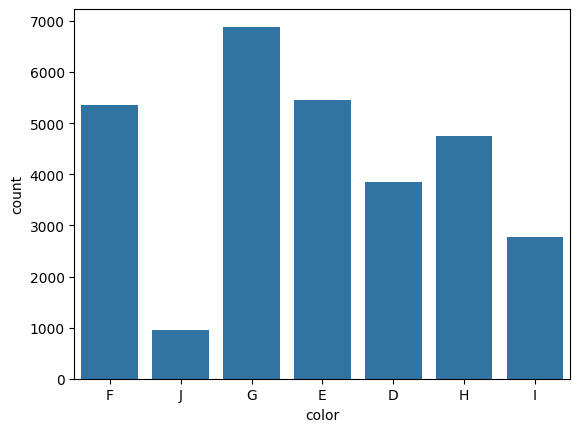

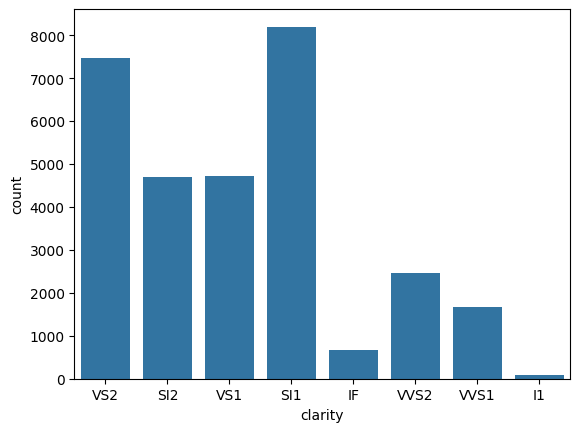

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in categorical_columns:
    sns.countplot(data=df,x=i)
    print("\n")
    plt.show()

<Axes: >

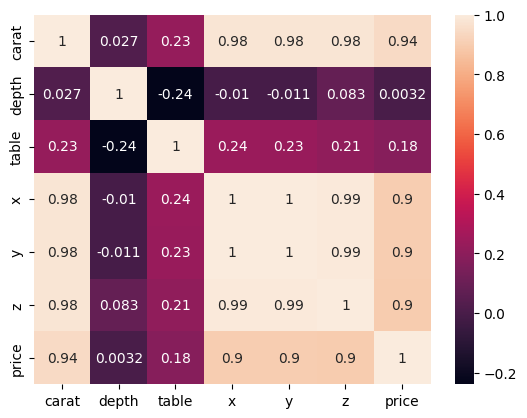

In [17]:
#Corelation
import seaborn as sns
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [18]:
#From the above heatmap we can see that there is high correlation between carat and x,y,z which is nearly 98%,
#so instead of using x,y,z we can use carat column
##If there is high correlation between the independent features we can drop off the highly corelated features
#This concept is called multicolinearity

In [19]:
Currently not execute this 
#df.drop(labels=['x','y','z'],axis=1)

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
...,...,...,...,...,...,...,...
30009,0.30,Ideal,G,SI1,62.7,57.0,431
30010,2.20,Ideal,G,SI2,62.3,57.0,12900
30011,1.50,Ideal,G,VVS2,61.7,56.0,15164
30012,0.40,Very Good,D,VVS1,60.4,58.0,1257


In [20]:
df.shape

(30014, 10)

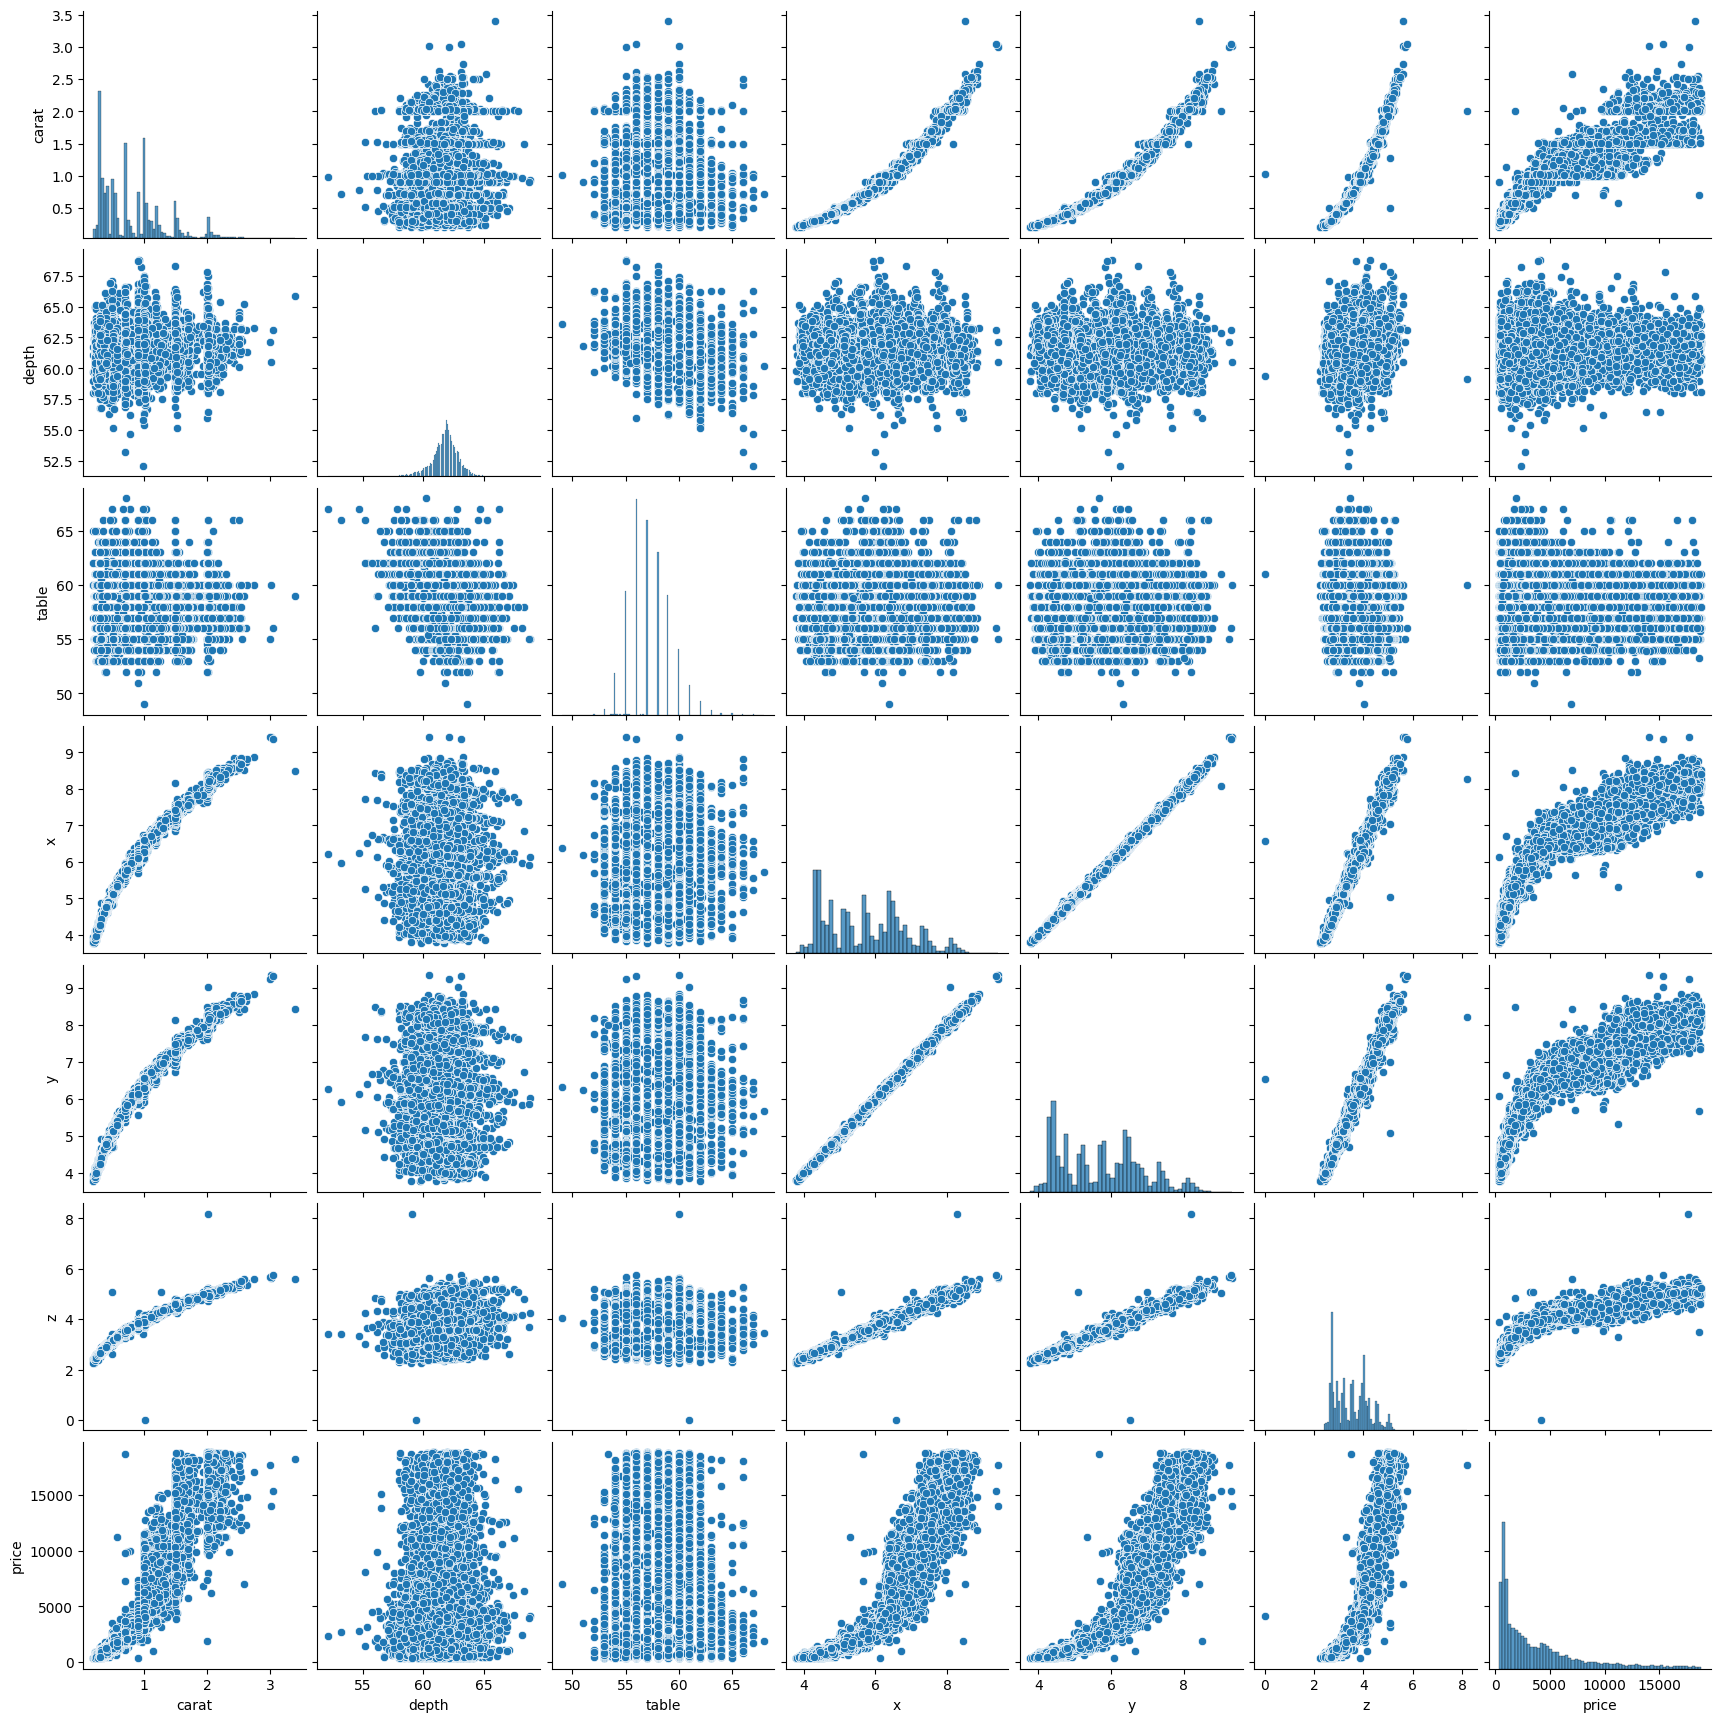

In [59]:
sns.pairplot(df)

In [ ]:
# Referred the ranking of the below cut,clarity and color features from the website https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/

In [21]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [22]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [23]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [24]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [25]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [26]:
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [27]:
df['cut']=df['cut'].replace(cut_map)
df['clarity']=df['clarity'].replace(clarity_map)
df['color']=df['color'].replace(color_map)

In [28]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
